In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import itertools

/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/Users/bogdanivanyuk/anaconda3/lib/python2.7/si

In [2]:
train = pd.read_csv('train.csv').fillna(-1)

# Creating new helpful features

In [3]:
train['Title'] = train['Name']
# Cleaning name and extracting Title
for name_string in train['Name']:
    train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
train.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = train.groupby('Title')['Age'].median()[titles.index(title)]
    train
    train.loc[(train['Age'].isnull()) & (train['Title'] == title), 'Age'] = age_to_impute
# Calculating Family size
train['Family_Size'] = train['Parch'] + train['SibSp']
train.drop(['Name'], axis=1, inplace=True)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,-1,S,Mr,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,-1,S,Mr,0


# Statistics 
Now lets have a look on different statistical analysis, like mean, min, max, percentiles, median, mode

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.600640,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,17.867496,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [6]:
train.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             24.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Family_Size      0.0000
dtype: float64

In [7]:
train[['Age', 'SibSp', 'Parch', 'Fare','Embarked']].mode(axis=0)

,Age,SibSp,Parch,Fare,Embarked
0,-1.0,0,0,8.05,S


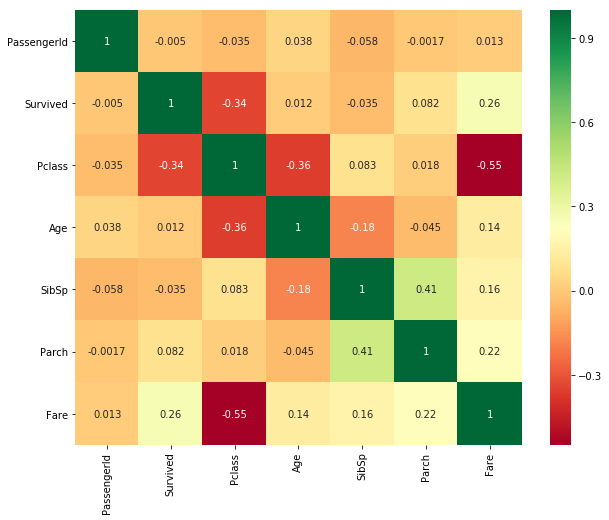

In [8]:
sns.heatmap(train[train.columns[:9]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Data visualization

/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/bogdanivanyuk/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  

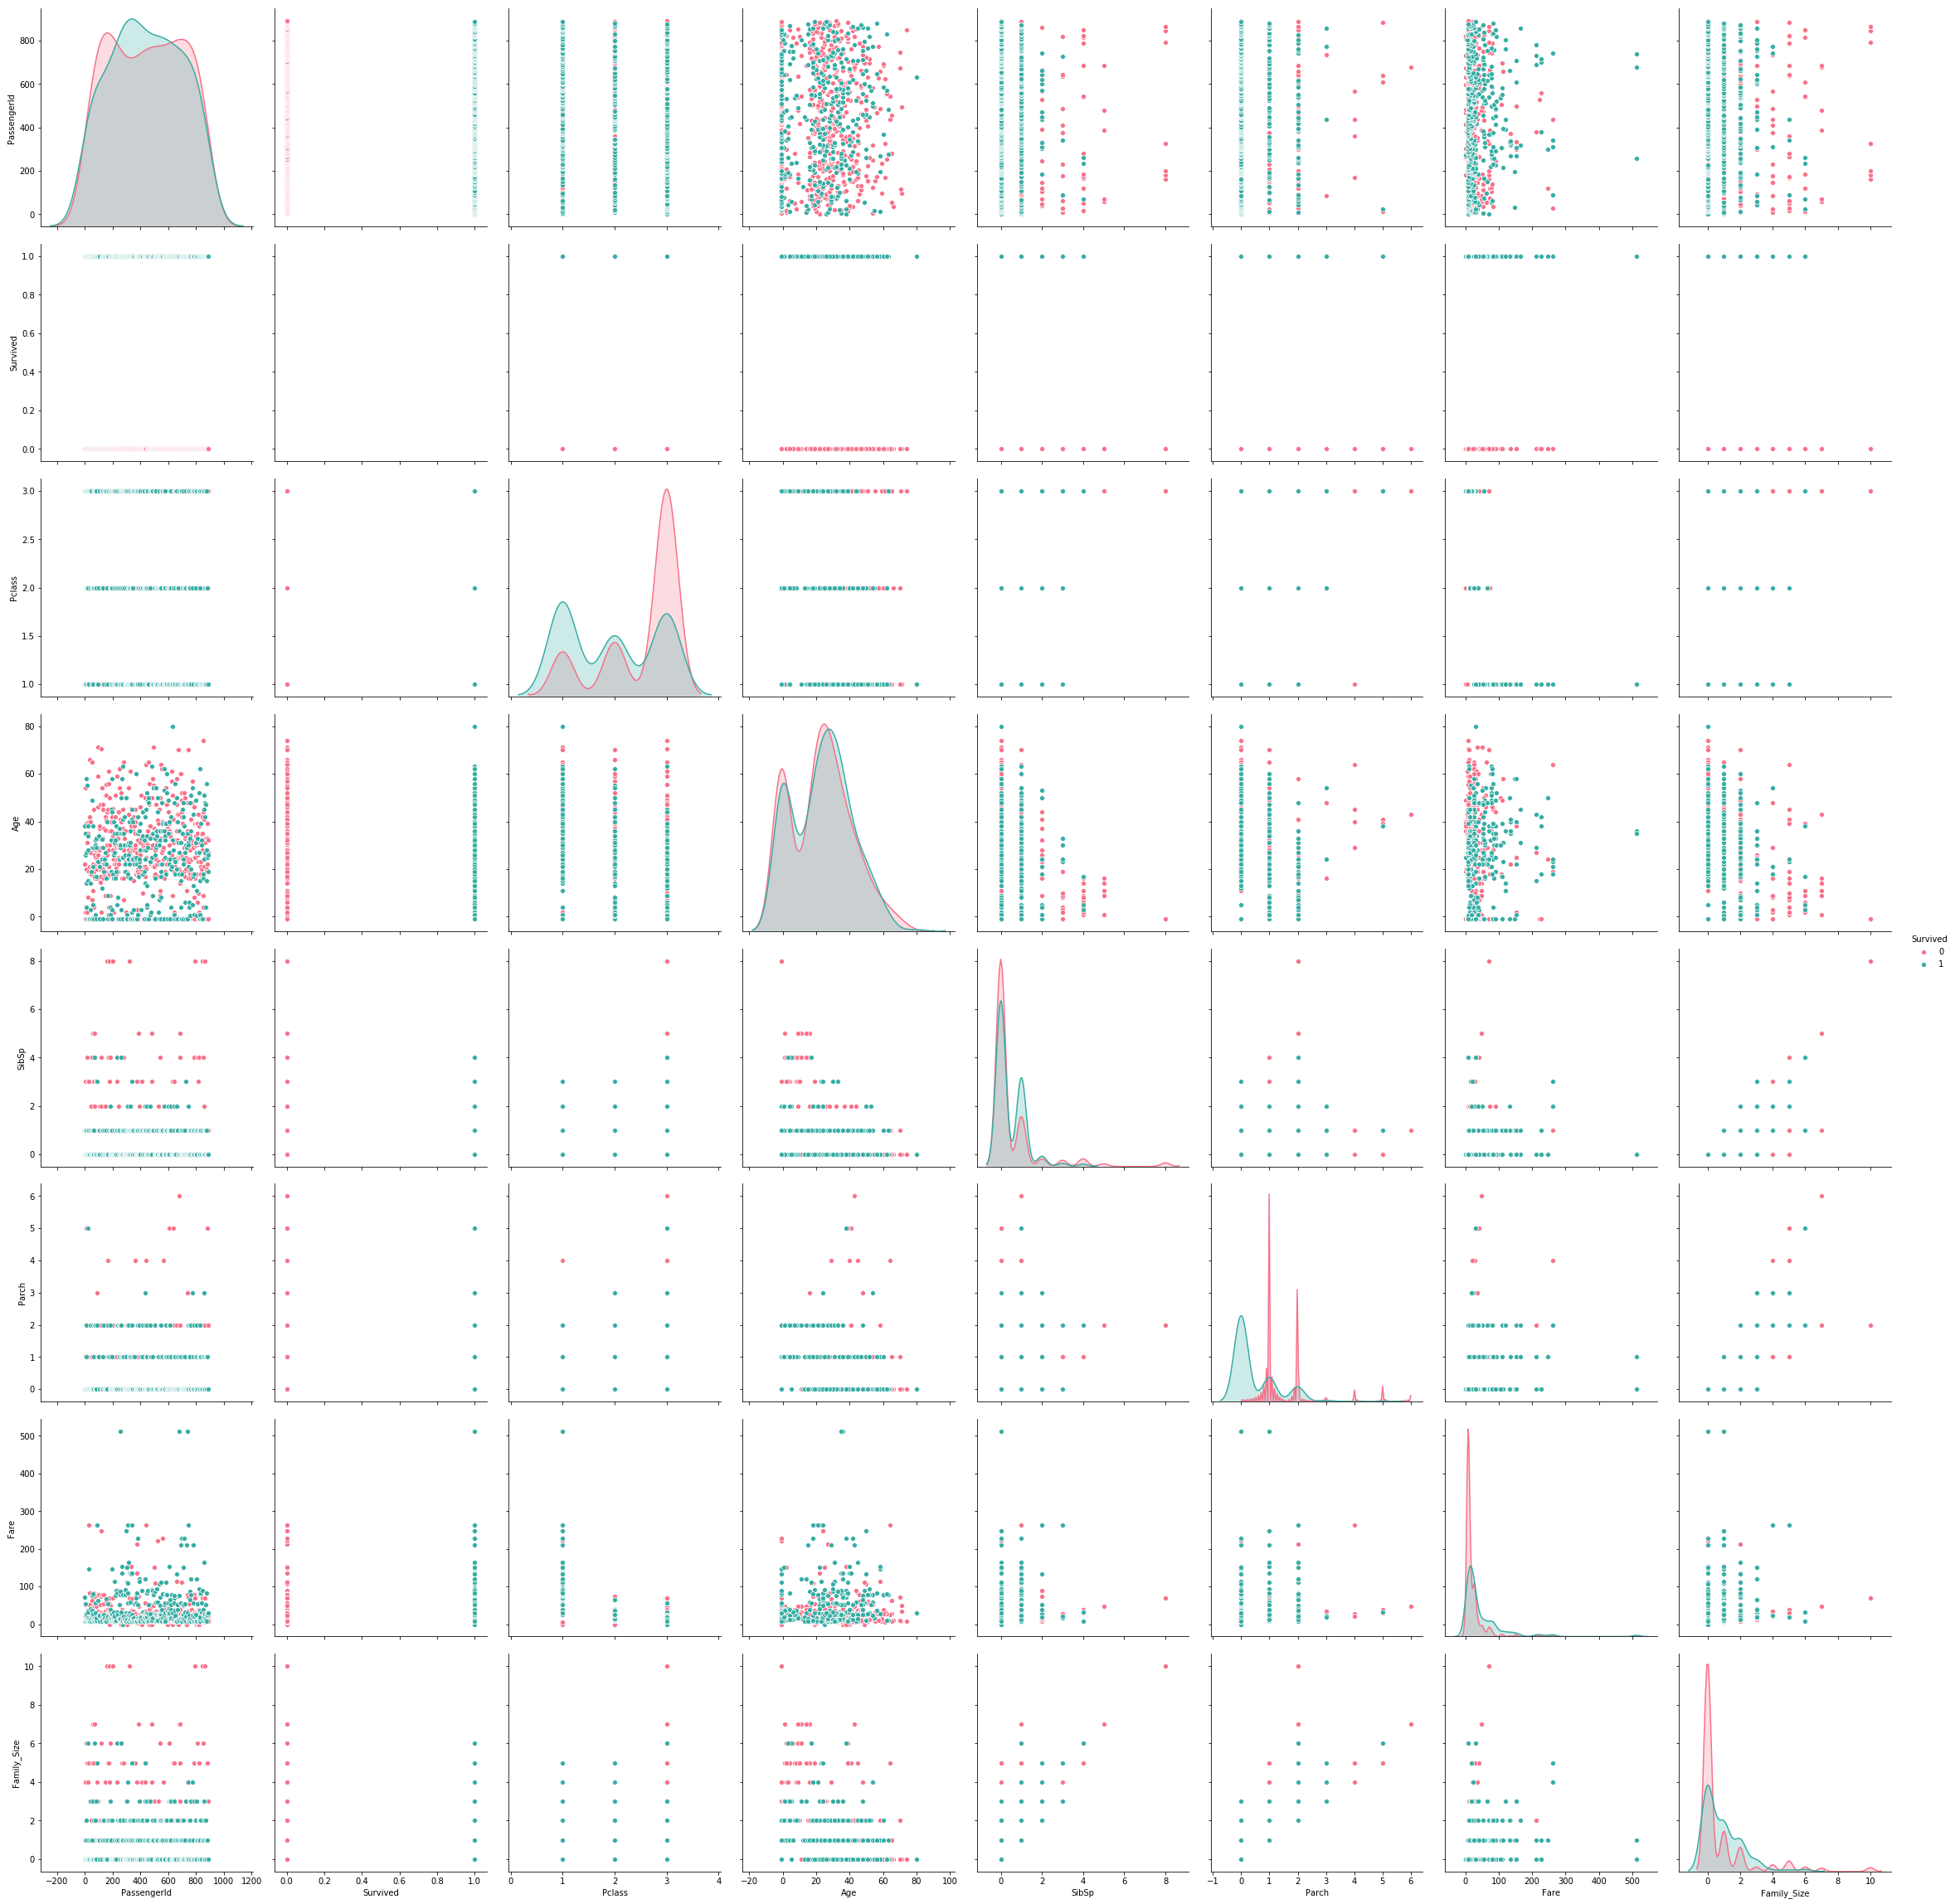

In [9]:
# pairplots of all columns
sns.pairplot(train, size=4, hue='Survived', palette='husl',)
plt.show()

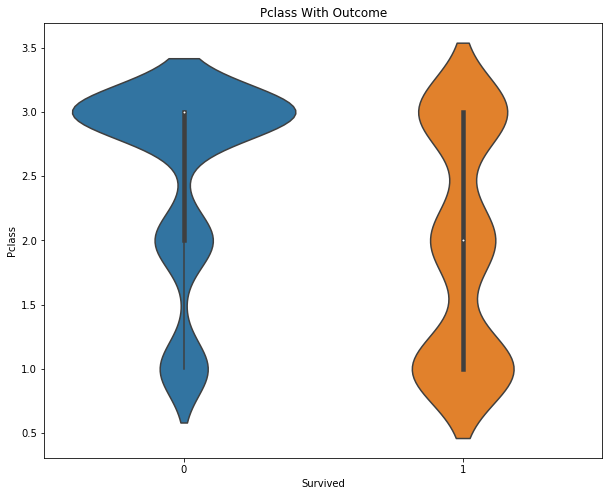

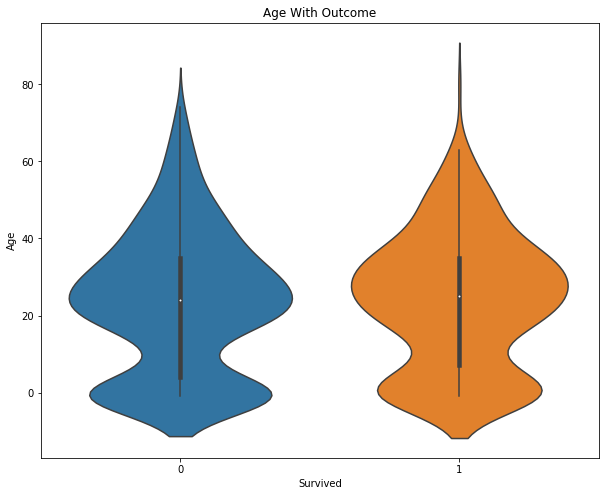

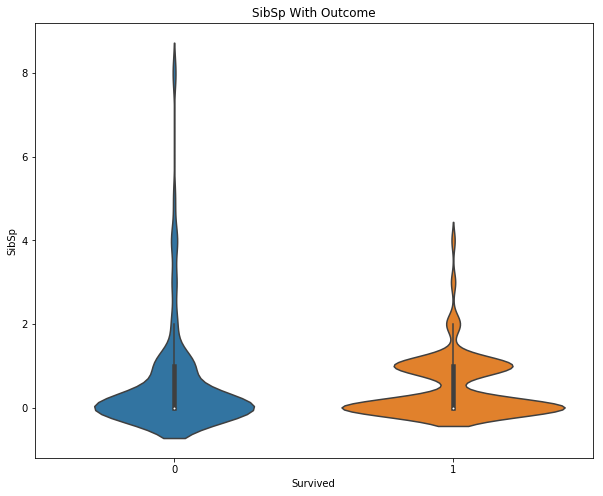

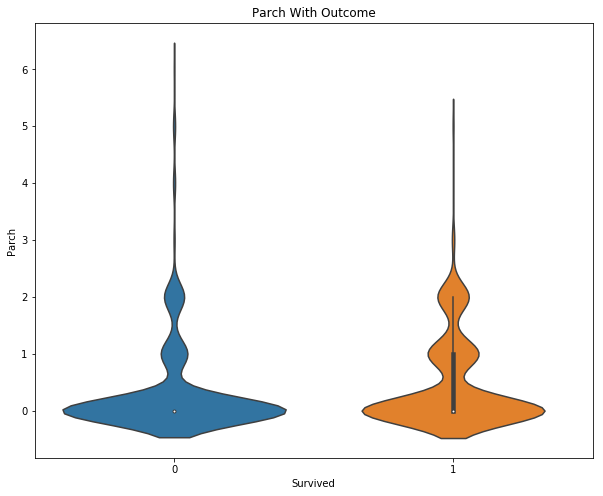

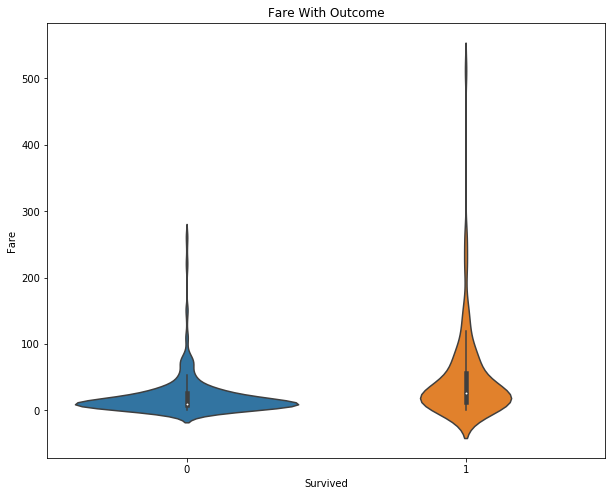

In [10]:
cols = train[['Pclass', 'Age', 'SibSp', 'Parch','Fare']]
for item in cols:
    plt.figure(figsize=(10, 8))
    plt.title(str(item) + ' With' + ' Outcome')
    sns.violinplot(x=train.Survived, y=train[item], data=train)
    plt.show()

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

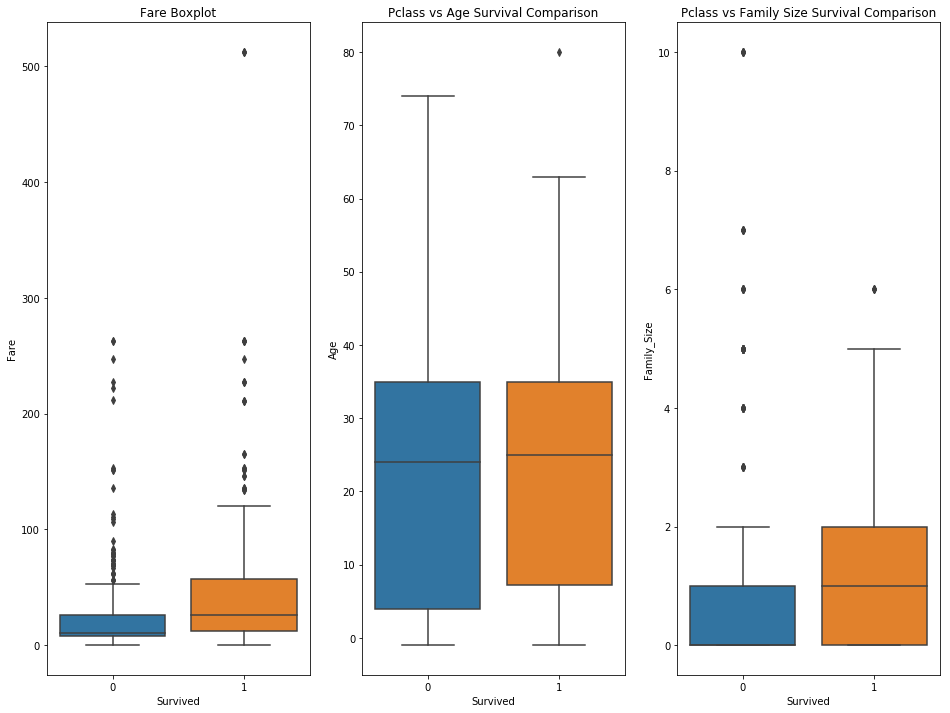

In [18]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,12))

sns.boxplot(x = 'Survived', y = 'Fare',  data = train, ax = axis1)
axis1.set_title('Fare Boxplot')

sns.boxplot(x = 'Survived', y = 'Age', data = train, ax = axis2)
axis2.set_title('Age Survival Comparison')

sns.boxplot(x = 'Survived', y ='Family_Size', data = train, ax = axis3)
axis3.set_title('Family Size Survival Comparison')

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

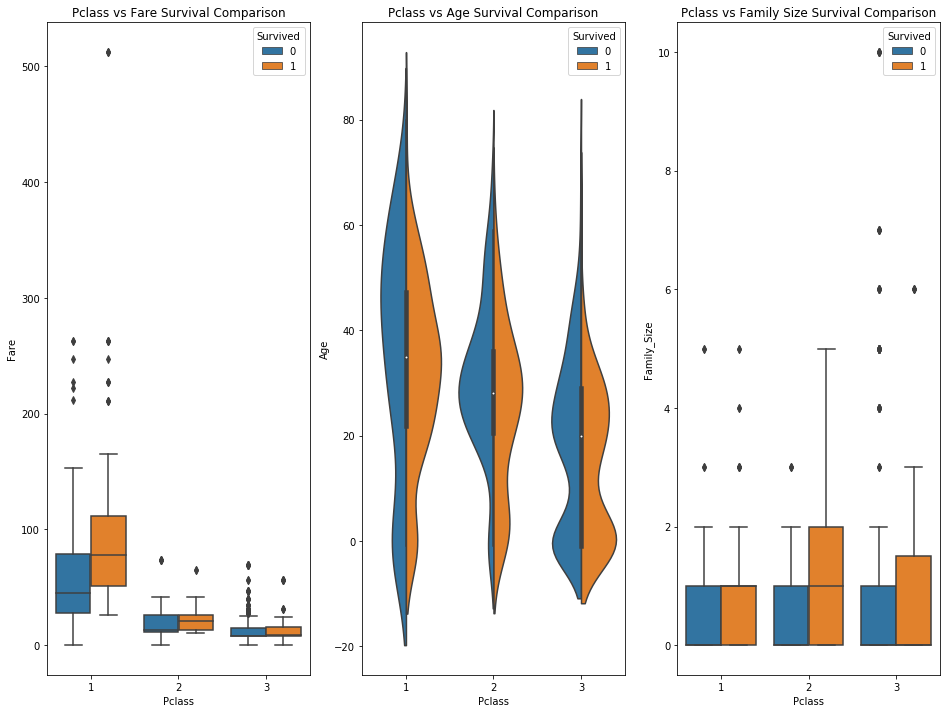

In [12]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='Family_Size', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

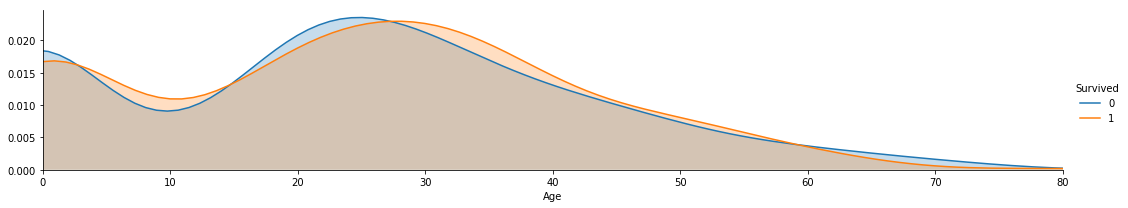

In [13]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=5)
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend();

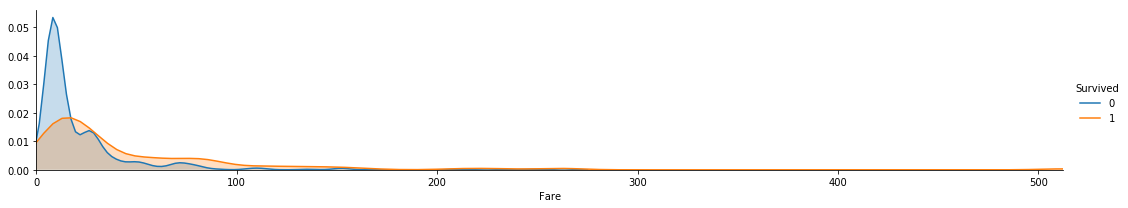

In [14]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=5)
a.map(sns.kdeplot, 'Fare', shade= True )
a.set(xlim=(0 , train['Fare'].max()))
a.add_legend();

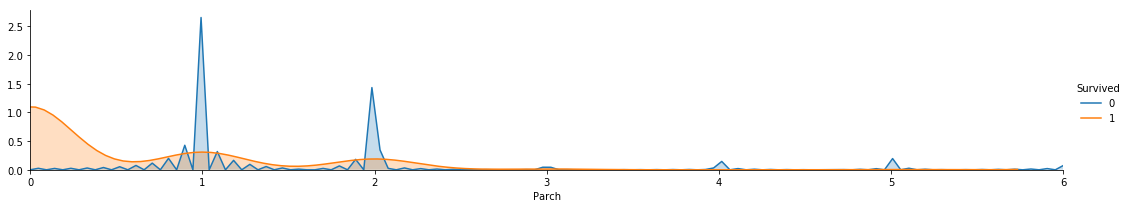

In [15]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=5)
a.map(sns.kdeplot, 'Parch', shade= True )
a.set(xlim=(0 , train['Parch'].max()))
a.add_legend();

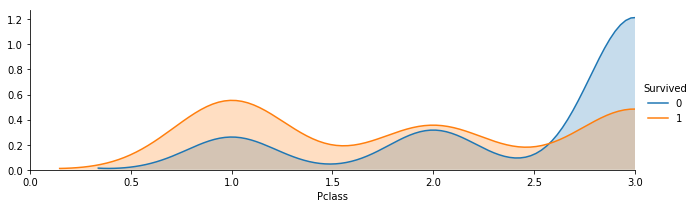

In [16]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=3)
a.map(sns.kdeplot, 'Pclass', shade= True )
a.set(xlim=(0 , train['Pclass'].max()))
a.add_legend();